In [1]:
# 准备数据
import os
path = r'E:\repo\ml_bt\MA'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA' in x]
all_path[-1]

'E:\\repo\\ml_bt\\MA\\MA2205.csv'

In [2]:
import pandas as pd
data = pd.read_csv(all_path[-1],index_col=0)
data

,date,open,high,low,close,volume,money,open_interest
0,2021-05-19 21:05:00,2721.0,2721.0,2598.0,2606.0,2.0,5.204000e+04,2.0
1,2021-05-19 21:10:00,2606.0,2648.0,2606.0,2648.0,1.0,2.647000e+04,2.0
2,2021-05-19 21:15:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0
3,2021-05-19 21:20:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0
4,2021-05-19 21:25:00,2648.0,2648.0,2637.0,2637.0,1.0,2.637000e+04,3.0
...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0


<AxesSubplot:>

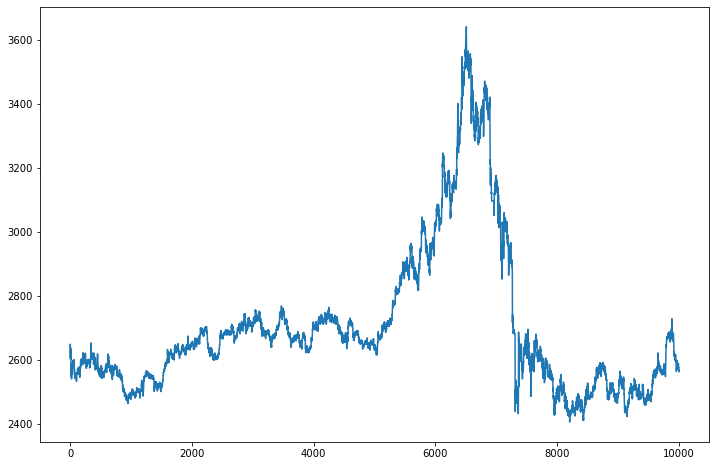

In [3]:
# 历史数据走势
data['close'].plot(figsize=(12,8))

In [4]:
# 导入因子
from CreateFeatures import * 
data = feature4(data,'date')
data

,date,open,high,low,close,volume,money,open_interest,feature4
0,2021-05-19 21:05:00,2721.0,2721.0,2598.0,2606.0,2.0,5.204000e+04,2.0,3
1,2021-05-19 21:10:00,2606.0,2648.0,2606.0,2648.0,1.0,2.647000e+04,2.0,3
2,2021-05-19 21:15:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0,3
3,2021-05-19 21:20:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0,3
4,2021-05-19 21:25:00,2648.0,2648.0,2637.0,2637.0,1.0,2.637000e+04,3.0,3
...,...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0,2
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0,2
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0,2
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0,2


In [5]:
series = data.iloc[:,-1]

In [6]:
# 检查分类型变量类型
series.unique()

array([3, 4, 5, 1, 2], dtype=int64)

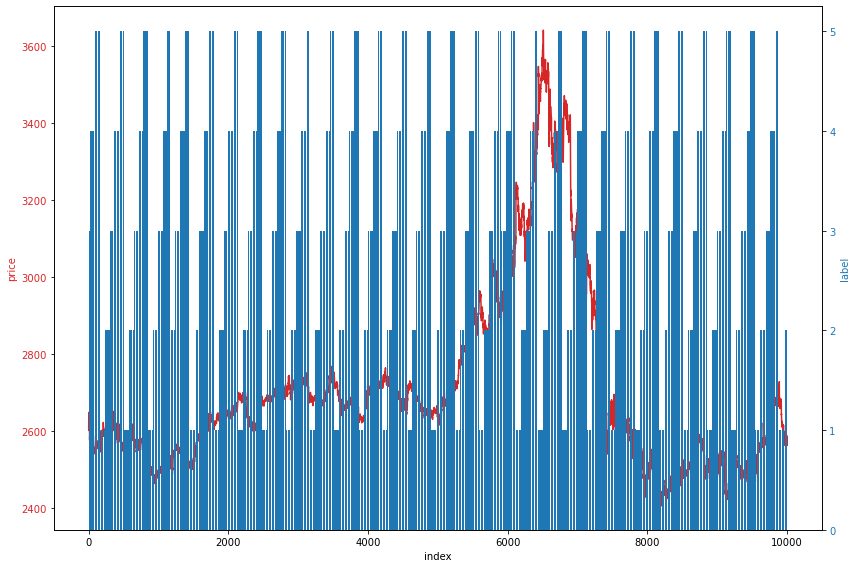

In [7]:
# 对于分类型标签
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12,8))
color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('price', color=color)
ax1.plot(data.index, data.close, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('label', color=color)
ax2.bar(data.index, series, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()
